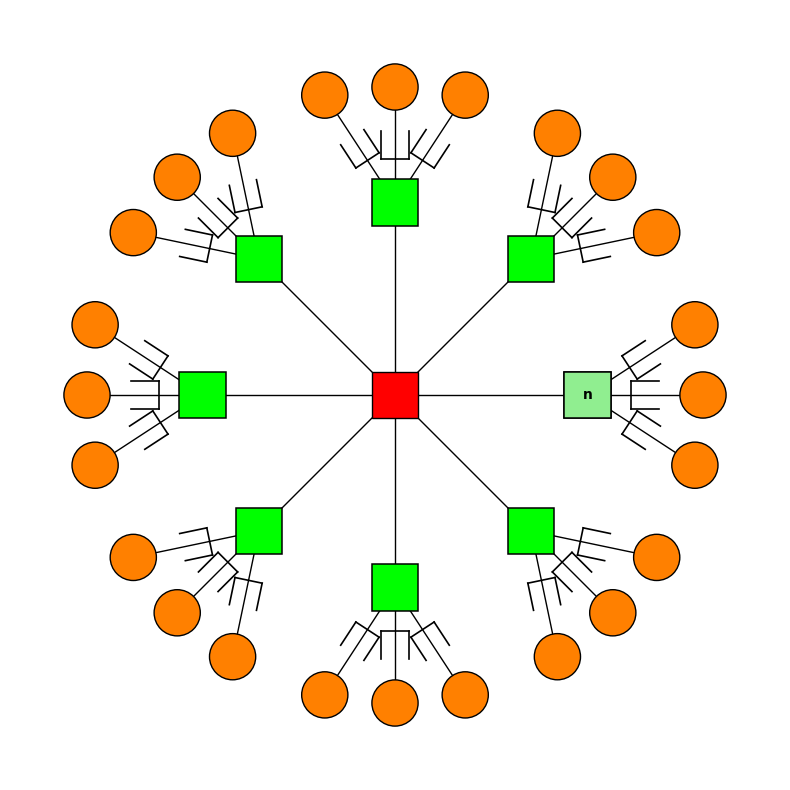

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def draw_open_square(ax, center, size=1.0, color='#90ee90', linewidth=1, angle_deg=0):
    """Рисует квадрат без верхней грани, с возможностью поворота."""
    # Вершины квадрата до поворота (по часовой стрелке)
    half = size / 2
    points = np.array([
        [-half, -half],  # левая нижняя
        [ half, -half],  # правая нижняя
        [ half,  half],  # правая верхняя
        [-half,  half],  # левая верхняя
    ])
    # Поворот
    theta = np.deg2rad(angle_deg)
    rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    points = points @ rot.T + np.array(center)

    # Рисуем 3 стороны (без верхней)
    ax.plot([points[0,0], points[1,0]], [points[0,1], points[1,1]], color=color, linewidth=linewidth) # низ
    ax.plot([points[1,0], points[2,0]], [points[1,1], points[2,1]], color=color, linewidth=linewidth) # право
    ax.plot([points[3,0], points[0,0]], [points[3,1], points[0,1]], color=color, linewidth=linewidth) # лево

def draw_graph_grouped(num_green, num_orange_per_green, outer_radius, inner_radius, group_spread=0.23, 
                       square_size=0.2, circle_size=0.5, center_size=0.4, connect_green=True, show_n_in_extra=False):
    fig, ax = plt.subplots(figsize=(10, 10))
    #fig, ax = plt.subplots(figsize=(20, 20), dpi=100)

    # Центральный квадрат
    ax.add_patch(
        patches.Rectangle((-center_size/2, -center_size/2), center_size, center_size, 
                          facecolor="red", edgecolor="black", linewidth=1, zorder=3)
    )

    max_display_green_nodes = 8
    num_green2 = min(num_green, max_display_green_nodes)
    angles = np.linspace(np.pi / 2, 2.5 * np.pi, num_green2, endpoint=False)

    green_positions = []
    for angle in angles:
        x = inner_radius * np.cos(angle)
        y = inner_radius * np.sin(angle)
        green_positions.append((x, y))

    extra_count = 0
    if num_green > max_display_green_nodes:
        extra_count = num_green - max_display_green_nodes
        right_angle = 0
        extra_pos = (inner_radius * np.cos(right_angle), inner_radius * np.sin(right_angle))

    # Линии от центра к зелёным квадратам
    for x, y in green_positions:
        ax.plot([0, x], [0, y], color="black", linewidth=1, zorder=1)

    # Линии между зелёными квадратами по кругу
    if connect_green:   
        for i in range(len(green_positions)):
            x1, y1 = green_positions[i]
            x2, y2 = green_positions[(i + 1) % len(green_positions)]
            ax.plot([x1, x2], [y1, y2], color="black", linewidth=1, zorder=1)


    # Обычные зелёные квадраты
    for x, y in green_positions:
        square = patches.Rectangle((x - square_size / 2, y - square_size / 2), square_size, square_size,
                                   facecolor='#00ff00', edgecolor="black", linewidth=1.1, zorder=3)
        ax.add_patch(square)

    # Если есть правый квадрат, рисуем его обычным
    if extra_count > 0:
        square = patches.Rectangle((extra_pos[0] - square_size / 2, extra_pos[1] - square_size / 2), square_size, square_size,
                                   facecolor='#90ee90', edgecolor="black", linewidth=1.1, zorder=3)
        ax.add_patch(square)
        if show_n_in_extra:
            ax.text(extra_pos[0], extra_pos[1], "n", color="black", fontsize=10, ha="center", va="center", fontweight="bold", zorder=5)
        else:
            ax.text(extra_pos[0], extra_pos[1], f"+{extra_count}", color="black", fontsize=10, ha="center", va="center", fontweight="bold", zorder=5)

    # Оранжевые кружки и открытые квадраты возле них
    
        # ...existing code...
    for i, (x, y) in enumerate(green_positions):
        angle = angles[i]
        if num_orange_per_green > 3:
            # Один круг с числом внутри
            gx = outer_radius * np.cos(angle)
            gy = outer_radius * np.sin(angle)
            circle = patches.Circle((gx, gy), circle_size, facecolor=(1, 0.5, 0), edgecolor="black", linewidth=1, zorder=4)
            ax.add_patch(circle)
            ax.text(gx, gy, str(num_orange_per_green), color="black", fontsize=10, ha="center", va="center", fontweight="bold", zorder=5)
            ax.plot([x, gx], [y, gy], color="black", linewidth=1, zorder=1)
            # Открытый квадрат в центре между зеленым и оранжевым (увеличен на 50%)
            sqx = (x + gx) / 2
            sqy = (y + gy) / 2
            angle_deg = np.rad2deg(np.arctan2(gy - sqy, gx - sqx)) - 90
            draw_open_square(ax, (sqx, sqy), size=square_size * 0.6, color='black', linewidth=1.2, angle_deg=angle_deg)
        else:
            sub_angles = np.linspace(-group_spread, group_spread, num_orange_per_green)
            for offset in sub_angles:
                gx = outer_radius * np.cos(angle + offset)
                gy = outer_radius * np.sin(angle + offset)
                circle = patches.Circle((gx, gy), circle_size, facecolor=(1, 0.5, 0), edgecolor="black", linewidth=1, zorder=4)
                ax.add_patch(circle)
                ax.plot([x, gx], [y, gy], color="black", linewidth=1, zorder=1)
                # Открытый квадрат в центре между зеленым и оранжевым (увеличен на 50%)
                sqx = (x + gx) / 2
                sqy = (y + gy) / 2
                angle_deg = np.rad2deg(np.arctan2(gy - sqy, gx - sqx)) - 90
                draw_open_square(ax, (sqx, sqy), size=square_size * 0.6, color='black', linewidth=1.2, angle_deg=angle_deg)
    # ...existing code...



    ax.set_aspect('equal')
    ax.set_xlim(-outer_radius - 2, outer_radius + 2)
    ax.set_ylim(-outer_radius - 2, outer_radius + 2)
    ax.axis('off')

    # Сохраняем изображение в pdf, png, jpg
    plt.savefig("graph_output.pdf", bbox_inches='tight')
    plt.savefig("graph_output.svg", bbox_inches='tight')
    plt.savefig("graph_output.jpg", bbox_inches=None, dpi=200)  # 2000x2000 px при figsize=(10,10)

    plt.show()

# Пример использования:
draw_graph_grouped(num_green=15, num_orange_per_green=3, outer_radius=8, inner_radius=5, square_size=1.2, circle_size=0.6, center_size=1.2, connect_green=False, show_n_in_extra=True)

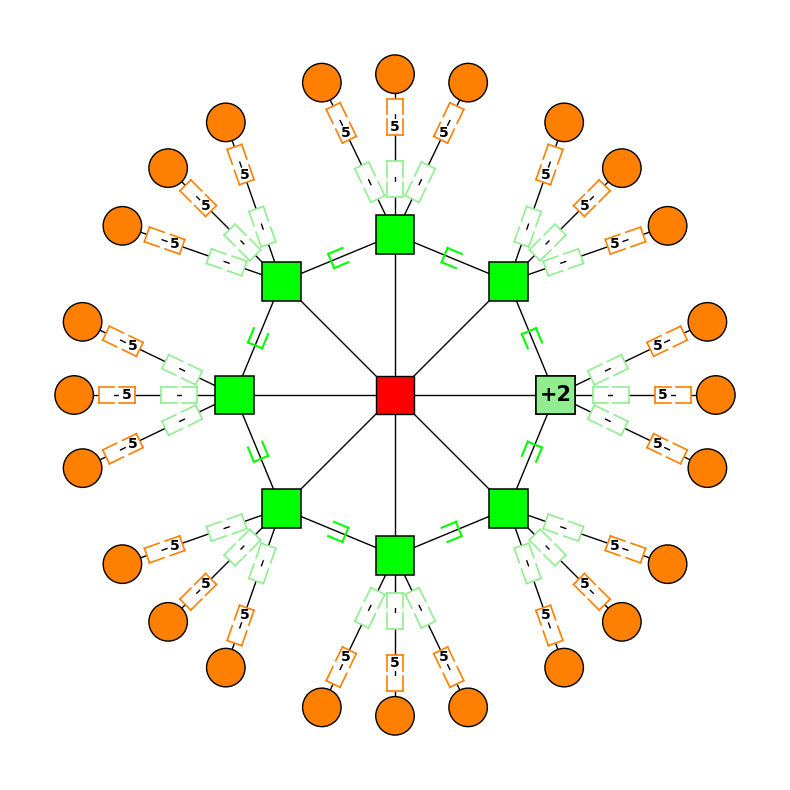

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def draw_open_square(ax, center, size=1.0, color='#90ee90', linewidth=1, angle_deg=0):
    """Draws a square without the top edge, with rotation support."""
    # Vertices of the square before rotation (clockwise)
    half = size / 2
    points = np.array([
        [-half, -half],  # bottom left
        [ half, -half],  # bottom right
        [ half,  half],  # top right
        [-half,  half],  # top left
    ])
    # Rotation
    theta = np.deg2rad(angle_deg)
    rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    points = points @ rot.T + np.array(center)

    # Draw white background rectangle (covers anything behind)
    ax.add_patch(
        patches.Polygon(points, closed=True, facecolor='white', edgecolor='none', zorder=1)
    )

    # Draw 3 sides (without the top)
    ax.plot([points[0,0], points[1,0]], [points[0,1], points[1,1]], color=color, linewidth=linewidth) # bottom
    ax.plot([points[1,0], points[2,0]], [points[1,1], points[2,1]], color=color, linewidth=linewidth) # right
    ax.plot([points[3,0], points[0,0]], [points[3,1], points[0,1]], color=color, linewidth=linewidth) # left

def draw_graph_grouped(num_green, num_orange_per_green, 
                       circle_instead_of_star=True, show_n_instead_of_number=False, buffer_number=None):
    
    # Sizes of elements and radii
    outer_radius=10
    inner_radius=5 
    group_spread=0.23 
    square_size=1.2
    circle_size=0.6
    center_size=1.2

    # Fixed image size 2000x2000 pixels for JPG (figsize=10, dpi=200)
    fig, ax = plt.subplots(figsize=(10, 10))

    # Central square
    ax.add_patch(
        patches.Rectangle((-center_size/2, -center_size/2), center_size, center_size, 
                          facecolor="red", edgecolor="black", linewidth=1, zorder=3)
    )

    max_display_green_nodes = 8
    num_green2 = min(num_green, max_display_green_nodes)
    angles = np.linspace(np.pi / 2, 2.5 * np.pi, num_green2, endpoint=False)

    green_positions = []
    for angle in angles:
        x = inner_radius * np.cos(angle)
        y = inner_radius * np.sin(angle)
        green_positions.append((x, y))

    extra_count = 0
    if num_green > max_display_green_nodes:
        extra_count = num_green - max_display_green_nodes
        right_angle = 0
        extra_pos = (inner_radius * np.cos(right_angle), inner_radius * np.sin(right_angle))
    # ...existing code...

    # Draw open squares between green squares
    for i in range(len(green_positions)):
        x1, y1 = green_positions[i]
        x2, y2 = green_positions[(i + 1) % len(green_positions)]
        mx = (x1 + x2) / 2
        my = (y1 + y2) / 2
        angle_deg = np.rad2deg(np.arctan2(y2 - y1, x2 - x1))
        draw_open_square(ax, (mx, my), size=square_size * 0.4, color='#00ff00', linewidth=1.5, angle_deg=angle_deg+90)

    # Lines from the center to the green squares
    for x, y in green_positions:
        ax.plot([0, x], [0, y], color="black", linewidth=1, zorder=1)

    # Lines between green squares in a circle
    if circle_instead_of_star:   
        for i in range(len(green_positions)):
            x1, y1 = green_positions[i]
            x2, y2 = green_positions[(i + 1) % len(green_positions)]
            ax.plot([x1, x2], [y1, y2], color="black", linewidth=1, zorder=1)

    # Draw green squares
    for x, y in green_positions:
        square = patches.Rectangle((x - square_size / 2, y - square_size / 2), square_size, square_size,
                                   facecolor='#00ff00', edgecolor="black", linewidth=1.1, zorder=3)
        ax.add_patch(square)

    # If there is an extra square, draw it
    if extra_count > 0:
        square = patches.Rectangle((extra_pos[0] - square_size / 2, extra_pos[1] - square_size / 2), square_size, square_size,
                                   facecolor='#90ee90', edgecolor="black", linewidth=1.1, zorder=3)
        ax.add_patch(square)
        if show_n_instead_of_number:
            ax.text(extra_pos[0], extra_pos[1], "n", color="black", fontsize=15, ha="center", va="center", fontweight="bold", zorder=5)
        else:
            ax.text(extra_pos[0], extra_pos[1], f"+{extra_count}", color="black", fontsize=15, ha="center", va="center", fontweight="bold", zorder=5)

    # Orange circles and open squares near them
    for i, (x, y) in enumerate(green_positions):
        angle = angles[i]
        if num_orange_per_green > 3:
            # One circle with a number inside
            gx = outer_radius * np.cos(angle)
            gy = outer_radius * np.sin(angle)
            circle = patches.Circle((gx, gy), circle_size, facecolor=(1, 0.5, 0), edgecolor="black", linewidth=1, zorder=4)
            ax.add_patch(circle)
            ax.text(gx, gy, str(num_orange_per_green), color="black", fontsize=10, ha="center", va="center", fontweight="bold", zorder=5)
            ax.plot([x, gx], [y, gy], color="black", linewidth=1, zorder=1)
            # Open square in the center between green and orange (increased by 50%)
            sqx = (x + gx) / 2
            sqy = (y + gy) / 2
            angle_deg = np.rad2deg(np.arctan2(gy - sqy, gx - sqx)) - 90
            draw_open_square(ax, (sqx, sqy), size=square_size * 0.6, color=(1, 0.5, 0), linewidth=1.2, angle_deg=angle_deg)
            # Draw number in open square
            number = buffer_number if buffer_number is not None else (i + 1)
            ax.text(sqx, sqy, str(number), color="black", fontsize=10, ha="center", va="center", fontweight="bold", zorder=6)
    
        else:
            sub_angles = np.linspace(-group_spread, group_spread, num_orange_per_green)
            for offset in sub_angles:
                gx = outer_radius * np.cos(angle + offset)
                gy = outer_radius * np.sin(angle + offset)
                circle = patches.Circle((gx, gy), circle_size, facecolor=(1, 0.5, 0), edgecolor="black", linewidth=1, zorder=4)
                ax.add_patch(circle)
                ax.plot([x, gx], [y, gy], color="black", linewidth=1, zorder=1)
                # Open square in the center between green and orange (increased by 50%)
                
                
                sqx = x + (gx - x) * 0.67
                sqy = y + (gy - y) * 0.67
                angle_deg = np.rad2deg(np.arctan2(gy - sqy, gx - sqx)) - 90
                draw_open_square(ax, (sqx, sqy), size=square_size * 0.4, color=(1, 0.5, 0), linewidth=1.2, angle_deg=angle_deg)
                
                
                sqx1 = x + (gx - x) * 0.80
                sqy1 = y + (gy - y) * 0.80
                draw_open_square(ax, (sqx1, sqy1), size=square_size * 0.4, color=(1, 0.5, 0), linewidth=1.2, angle_deg=angle_deg + 180)

                sqx2 = x + (gx - x) * 0.28
                sqy2 = y + (gy - y) * 0.28
                draw_open_square(ax, (sqx2, sqy2), size=square_size * 0.4, color='#90ee90', linewidth=1.2, angle_deg=angle_deg)
                
                
                sqx3 = x + (gx - x) * 0.41
                sqy3 = y + (gy - y) * 0.41
                draw_open_square(ax, (sqx3, sqy3), size=square_size * 0.4, color='#90ee90', linewidth=1.2, angle_deg=angle_deg + 180)
    

                # Draw number in open square
                offset = -square_size * 0.15
                number = buffer_number if buffer_number is not None else (j + 1)
                ax.text(sqx, sqy, str(number), color="black", fontsize=10, ha="center", va="center", fontweight="bold", zorder=12)

    ax.set_aspect('equal')
    ax.set_xlim(-outer_radius - 2, outer_radius + 2)
    ax.set_ylim(-outer_radius - 2, outer_radius + 2)
    ax.axis('off')

    # Save image in pdf, svg, jpg, png formats
    plt.savefig("graph_output.pdf", bbox_inches='tight')
    plt.savefig("graph_output.svg", bbox_inches='tight')
    plt.savefig("graph_output.jpg", bbox_inches=None, dpi=200)  # 2000x2000 px
    plt.savefig("graph_output.png", bbox_inches=None, dpi=200)  # 2000x2000 px

    plt.show()

# Example usage:
draw_graph_grouped(num_green=10, num_orange_per_green=3, 
                   circle_instead_of_star=True, show_n_instead_of_number=False, 
                   buffer_number=5)